In [6]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import scale
import sklearn.linear_model as lm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error,classification_report,confusion_matrix,roc_curve,roc_auc_score,ConfusionMatrixDisplay,precision_score, recall_score,f1_score


In [9]:
diabetes_dataset=pd.read_csv("/content/drive/MyDrive/diabetes_prediction_dataset.csv")

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
diabetes_dataset.shape

(100000, 9)

In [11]:
diabetes_dataset.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,41.885856,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,22.516840,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,0.080000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,43.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,60.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,80.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [12]:
missing_va=diabetes_dataset.isna().sum()
print("Missing values/ Null Values:\n",missing_va)

Missing values/ Null Values:
 gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64


In [13]:
df=diabetes_dataset.copy()

In [14]:
df.duplicated().sum()

3854

In [15]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [16]:
df.drop(columns="diabetes",inplace=True)

In [17]:
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level
0,Female,80.0,0,1,never,25.19,6.6,140
1,Female,54.0,0,0,No Info,27.32,6.6,80
2,Male,28.0,0,0,never,27.32,5.7,158
3,Female,36.0,0,0,current,23.45,5.0,155
4,Male,76.0,1,1,current,20.14,4.8,155


In [18]:
# Mapping dictionary for gender
gender_mapping = {'Female': 0, 'Male': 1,"Other":2}
# Replace string values with integer values
diabetes_dataset['gender'] = diabetes_dataset['gender'].replace(gender_mapping)

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'hypertension'}>],
       [<Axes: title={'center': 'heart_disease'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'HbA1c_level'}>,
        <Axes: title={'center': 'blood_glucose_level'}>]], dtype=object)

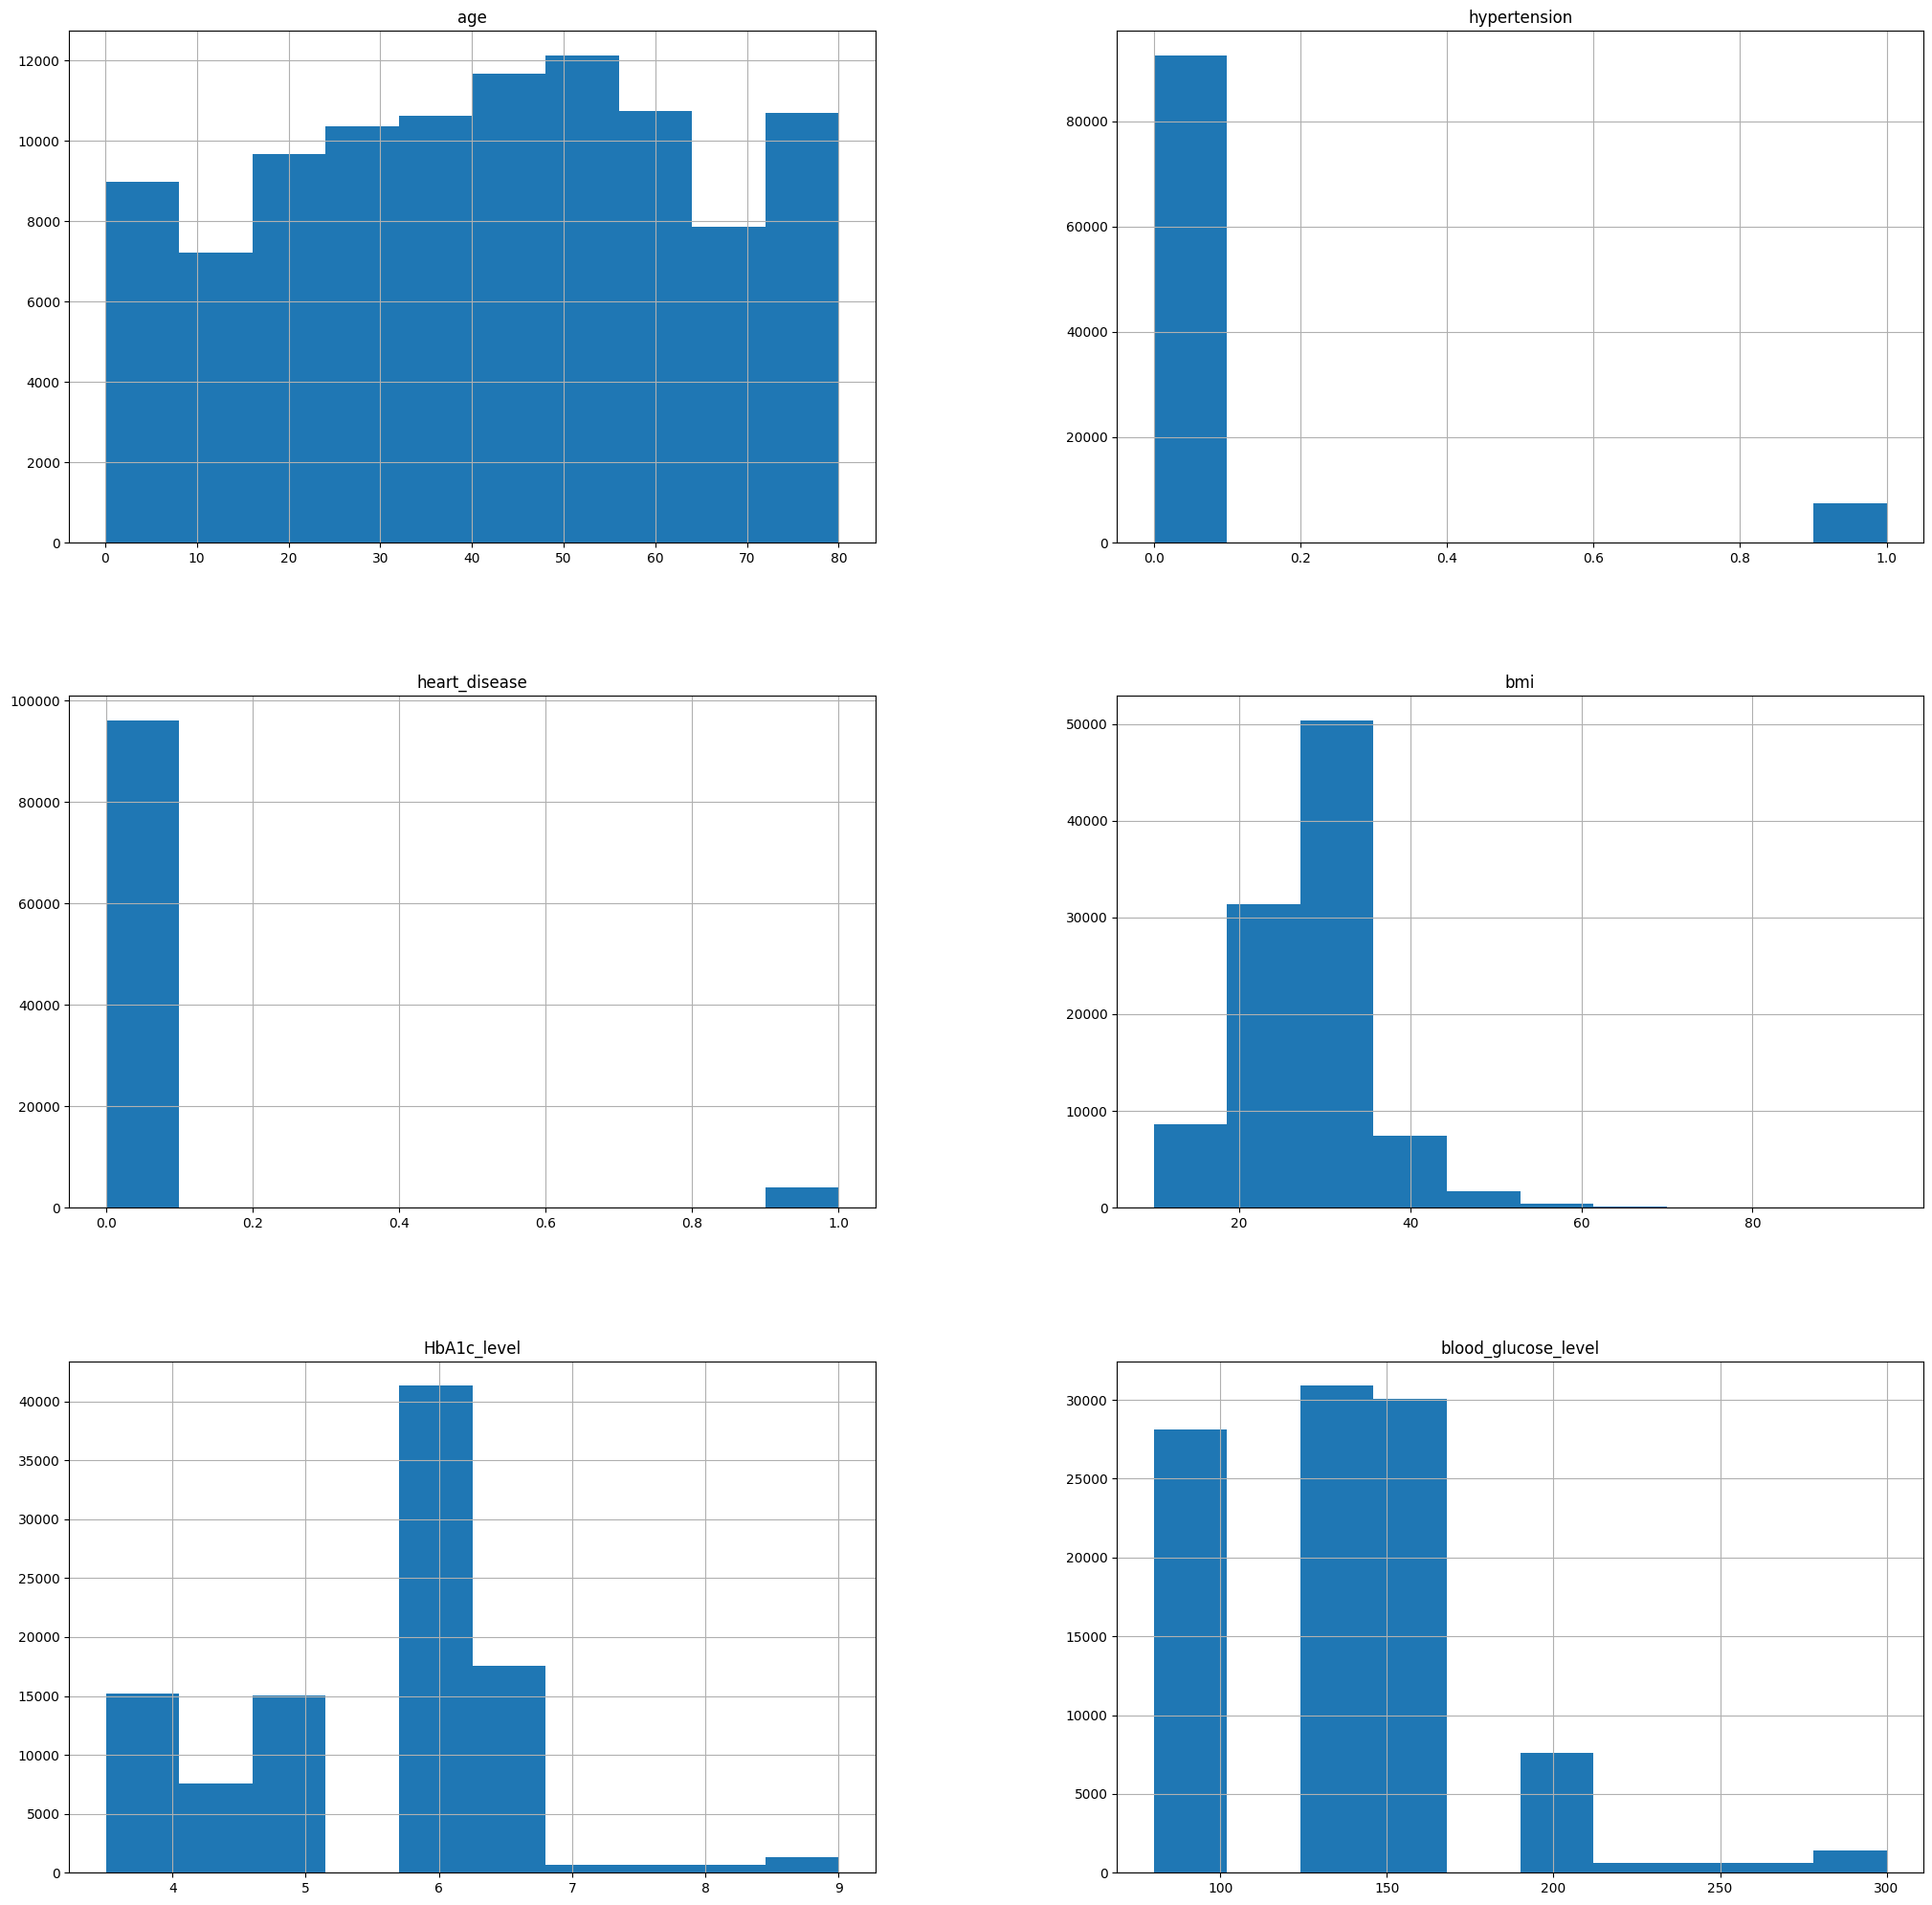

In [19]:
df.hist(figsize=(25,25))

In [20]:
smoking_mapping={"No Info":-1,"never":0,"former":1,"current":2,"not current":3,"ever":4}
diabetes_dataset['smoking_history'] = diabetes_dataset['smoking_history'].replace(smoking_mapping)

In [21]:
X = diabetes_dataset[['gender', 'age', 'hypertension', 'heart_disease', 'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level']]
y = diabetes_dataset['diabetes']

In [22]:
#Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [23]:
# Step 4: Train a decision tree classifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier()

In [24]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Accuracy: 0.9539

Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97     18292
           1       0.73      0.74      0.73      1708

    accuracy                           0.95     20000
   macro avg       0.85      0.86      0.85     20000
weighted avg       0.95      0.95      0.95     20000


Confusion Matrix:
[[17818   474]
 [  448  1260]]


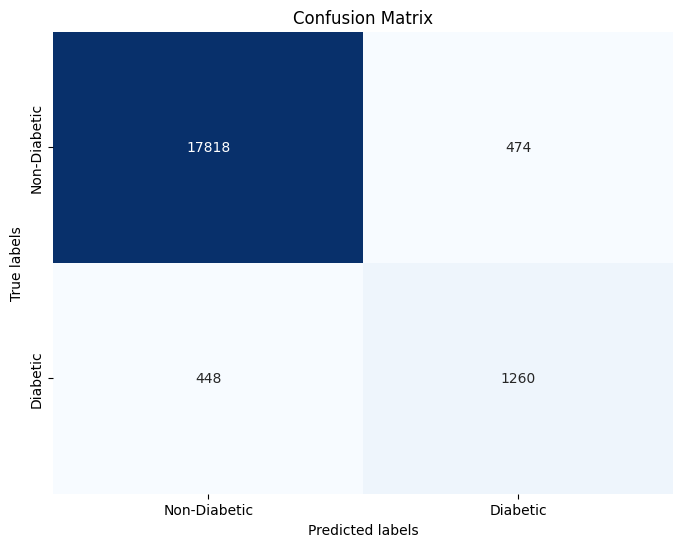

In [25]:
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', cbar=False,
            xticklabels=['Non-Diabetic', 'Diabetic'], yticklabels=['Non-Diabetic', 'Diabetic'])
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
from sklearn.tree import export_text

# Assuming 'clf' is your trained decision tree classifier
tree_rules = export_text(clf, feature_names=list(X.columns))
print(tree_rules)


|--- HbA1c_level <= 6.70
|   |--- blood_glucose_level <= 210.00
|   |   |--- age <= 54.50
|   |   |   |--- hypertension <= 0.50
|   |   |   |   |--- bmi <= 39.20
|   |   |   |   |   |--- age <= 42.50
|   |   |   |   |   |   |--- HbA1c_level <= 5.35
|   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |--- HbA1c_level >  5.35
|   |   |   |   |   |   |   |--- bmi <= 30.43
|   |   |   |   |   |   |   |   |--- blood_glucose_level <= 113.00
|   |   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |   |--- blood_glucose_level >  113.00
|   |   |   |   |   |   |   |   |   |--- smoking_history <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- age <= 11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 13
|   |   |   |   |   |   |   |   |   |   |--- age >  11.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 23
|   |   |   |   |   |   |   |   |   |--- smoking_history >  0.50
|   |   |   |   |   |   |   